<h2>Displays ti_melt model results for all snowy basins in a major basin, by surface type</h2>


In [1]:
%pylab notebook
import datetime as dt
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as md
from charistools.hypsometry import Hypsometry
from charistools.meltModels import ImshowTriSurfMelt
from charistools.meltModels import PlotTriSurfInput
from charistools.meltModels import PlotTriSurfMelt
from charistools.modelEnv import ModelEnv
from charistools.timeSeries import TimeSeries
import pandas as pd
import re
import os
pd.set_option('display.max_rows', 366)

/Users/brodzik/.conda/envs/charis/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [2]:
%cd /Users/brodzik/projects/CHARIS/derived_hypsometries/MODSCAG_GF_v09_fromFile_rainv01_less_ET/
%ls

/Users/brodzik/projects/CHARIS/derived_hypsometries/MODSCAG_GF_v09_fromFile_rainv01_less_ET
AM_OBJECTID100/            GA_Karnali_at_Benighat/
AM_OBJECTID62/             GA_Langtang_at_Kyanjin/
AM_OBJECTID64/             GA_Narayani_at_Devghat/
AM_OBJECTID65/             GA_SaptaKosi_at_Chatara/
AM_OBJECTID66/             GA_v01_OBJECTID1/
AM_OBJECTID68/             GA_v01_OBJECTID10/
AM_OBJECTID69/             GA_v01_OBJECTID12/
AM_OBJECTID72/             GA_v01_OBJECTID2/
AM_OBJECTID77/             GA_v01_OBJECTID22/
AM_OBJECTID78/             GA_v01_OBJECTID3/
AM_OBJECTID79/             GA_v01_OBJECTID32/
AM_OBJECTID80/             GA_v01_OBJECTID4/
AM_OBJECTID81/             GA_v01_OBJECTID6/
AM_OBJECTID82/             GA_v01_OBJECTID9/
AM_OBJECTID83/             IN_Hunza_at_DainyorBridge/
AM_OBJECTID84/             IN_v01_OBJECTID0/
AM_OBJECTID85/             IN_v01_OBJECTID10/
AM_OBJECTID86/             IN_v01_OBJECTID11/
AM_OBJECTID88/             IN_v01_OBJECTID12/
AM_OBJECTID8

In [32]:
# Generate a list of all OBJECTID basins
#majorBasinID = 'IN_v01'
majorBasinID = 'AM'
#majorBasinID = 'SY_v01'
drainageIDs = glob.glob("%s_OBJECTID*" % majorBasinID)
drainageIDs.sort()
#drainageIDs = drainageIDs[:2]
print(drainageIDs)
print("There are %d sub-basins for the %s major basin" % (len(drainageIDs), majorBasinID))

['AM_OBJECTID100', 'AM_OBJECTID62', 'AM_OBJECTID64', 'AM_OBJECTID65', 'AM_OBJECTID66', 'AM_OBJECTID68', 'AM_OBJECTID69', 'AM_OBJECTID72', 'AM_OBJECTID77', 'AM_OBJECTID78', 'AM_OBJECTID79', 'AM_OBJECTID80', 'AM_OBJECTID81', 'AM_OBJECTID82', 'AM_OBJECTID83', 'AM_OBJECTID84', 'AM_OBJECTID85', 'AM_OBJECTID86', 'AM_OBJECTID88', 'AM_OBJECTID89', 'AM_OBJECTID90', 'AM_OBJECTID91', 'AM_OBJECTID93', 'AM_OBJECTID94', 'AM_OBJECTID97', 'AM_OBJECTID98', 'AM_OBJECTID99']
There are 27 sub-basins for the AM major basin


In [33]:
years = np.arange(2) + 2001
fig, ax = plt.subplots(len(years),1, figsize=(12,3*len(years)))
for j, year in enumerate(years):
    # For each basin, get the 3 tri-surf melt files
    for i, drainageID in enumerate(drainageIDs):
        solfile = glob.glob("%s/%s.%d.*snow_on_land_melt_by_elev*" % (drainageID, drainageID, year))
        soifile = glob.glob("%s/%s.%d.*snow_on_ice_melt_by_elev*" % (drainageID, drainageID, year))
        egifile = glob.glob("%s/%s.%d.*exposed_glacier_ice_melt_by_elev*" % (drainageID, drainageID, year))
        print(year, drainageID)
        SOLmelt = Hypsometry(filename=solfile[0], verbose=True)
        SOImelt = Hypsometry(filename=soifile[0], verbose=True)
        EGImelt = Hypsometry(filename=egifile[0], verbose=True)
        # If SOLmelt is non-empty, but SOImelt and SGImelt are empty,
        # then make a copy of the dimensions of SOLmelt that is filled with zeroes
        if not SOLmelt.data.empty and SOImelt.data.empty and EGImelt.data.empty:
            SOImelt.data = SOLmelt.data.copy()
            SOImelt.data[:] = 0.
            EGImelt.data = SOLmelt.data.copy()
            EGImelt.data[:] = 0.
        if i == 0:
            title = "Modelled melt for CHARIS basin %s %d sub-basins (%d)" % (
                majorBasinID, len(drainageIDs), year)
            allSOLmelt = SOLmelt.data.copy()
            allSOImelt = SOImelt.data.copy()
            allEGImelt = EGImelt.data.copy()
        else:
            title = None
        ax[j] = PlotTriSurfMelt(ax[j], SOLmelt, SOImelt, EGImelt, title=title, linewidth=0.5)
        handles, labels = ax[j].get_legend_handles_labels()
        ax[j].legend(handles[:4], labels[:4], loc='best')
        
fig.tight_layout()
    


<IPython.core.display.Javascript object>

(2001, 'AM_OBJECTID100')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID100/AM_OBJECTID100.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 54 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID100/AM_OBJECTID100.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 54 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID100/AM_OBJECTID100.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 54 eleva

(2001, 'AM_OBJECTID62')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID62/AM_OBJECTID62.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 17 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID62/AM_OBJECTID62.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID62/AM_OBJECTID62.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> cha

(2001, 'AM_OBJECTID64')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID64/AM_OBJECTID64.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 2 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID64/AM_OBJECTID64.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID64/AM_OBJECTID64.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> char

(2001, 'AM_OBJECTID65')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID65/AM_OBJECTID65.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 28 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID65/AM_OBJECTID65.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID65/AM_OBJECTID65.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> cha

(2001, 'AM_OBJECTID66')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID66/AM_OBJECTID66.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 49 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID66/AM_OBJECTID66.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 49 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID66/AM_OBJECTID66.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 49 elevations.

(2001, 'AM_OBJECTID68')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID68/AM_OBJECTID68.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 20 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID68/AM_OBJECTID68.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID68/AM_OBJECTID68.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> cha

(2001, 'AM_OBJECTID69')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID69/AM_OBJECTID69.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 30 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID69/AM_OBJECTID69.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID69/AM_OBJECTID69.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> cha

(2001, 'AM_OBJECTID72')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID72/AM_OBJECTID72.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 42 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID72/AM_OBJECTID72.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 42 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID72/AM_OBJECTID72.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 42 elevations.

(2001, 'AM_OBJECTID77')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID77/AM_OBJECTID77.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 53 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID77/AM_OBJECTID77.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 53 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID77/AM_OBJECTID77.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 53 elevations.

(2001, 'AM_OBJECTID78')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID78/AM_OBJECTID78.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 55 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID78/AM_OBJECTID78.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 55 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID78/AM_OBJECTID78.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 55 elevations.

(2001, 'AM_OBJECTID79')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID79/AM_OBJECTID79.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 71 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID79/AM_OBJECTID79.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 71 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID79/AM_OBJECTID79.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 71 elevations.

(2001, 'AM_OBJECTID80')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID80/AM_OBJECTID80.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 43 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID80/AM_OBJECTID80.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 43 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID80/AM_OBJECTID80.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 43 elevations.

(2001, 'AM_OBJECTID81')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID81/AM_OBJECTID81.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 43 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID81/AM_OBJECTID81.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 43 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID81/AM_OBJECTID81.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 43 elevations.

(2001, 'AM_OBJECTID82')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID82/AM_OBJECTID82.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 62 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID82/AM_OBJECTID82.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 62 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID82/AM_OBJECTID82.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 62 elevations.

(2001, 'AM_OBJECTID83')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID83/AM_OBJECTID83.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 44 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID83/AM_OBJECTID83.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 44 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID83/AM_OBJECTID83.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 44 elevations.

(2001, 'AM_OBJECTID84')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID84/AM_OBJECTID84.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 36 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID84/AM_OBJECTID84.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID84/AM_OBJECTID84.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> cha

(2001, 'AM_OBJECTID85')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID85/AM_OBJECTID85.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 50 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID85/AM_OBJECTID85.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 50 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID85/AM_OBJECTID85.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 50 elevations.

(2001, 'AM_OBJECTID86')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID86/AM_OBJECTID86.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 36 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID86/AM_OBJECTID86.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 36 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID86/AM_OBJECTID86.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 36 elevations.

(2001, 'AM_OBJECTID88')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID88/AM_OBJECTID88.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 39 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID88/AM_OBJECTID88.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID88/AM_OBJECTID88.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> cha

(2001, 'AM_OBJECTID89')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID89/AM_OBJECTID89.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 34 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID89/AM_OBJECTID89.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 34 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID89/AM_OBJECTID89.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 34 elevations.

(2001, 'AM_OBJECTID90')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID90/AM_OBJECTID90.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 36 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID90/AM_OBJECTID90.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 36 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID90/AM_OBJECTID90.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 36 elevations.

(2001, 'AM_OBJECTID91')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID91/AM_OBJECTID91.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 23 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID91/AM_OBJECTID91.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID91/AM_OBJECTID91.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> cha

(2001, 'AM_OBJECTID93')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID93/AM_OBJECTID93.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 4 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID93/AM_OBJECTID93.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID93/AM_OBJECTID93.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> char

(2001, 'AM_OBJECTID94')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID94/AM_OBJECTID94.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 46 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID94/AM_OBJECTID94.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 46 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID94/AM_OBJECTID94.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 46 elevations.

(2001, 'AM_OBJECTID97')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID97/AM_OBJECTID97.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 64 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID97/AM_OBJECTID97.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 64 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID97/AM_OBJECTID97.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 64 elevations.

(2001, 'AM_OBJECTID98')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID98/AM_OBJECTID98.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 54 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID98/AM_OBJECTID98.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 54 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID98/AM_OBJECTID98.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 54 elevations.

(2001, 'AM_OBJECTID99')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID99/AM_OBJECTID99.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 48 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID99/AM_OBJECTID99.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 48 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID99/AM_OBJECTID99.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 48 elevations.

(2002, 'AM_OBJECTID100')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID100/AM_OBJECTID100.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 54 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID100/AM_OBJECTID100.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 54 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID100/AM_OBJECTID100.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 54 eleva

(2002, 'AM_OBJECTID62')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID62/AM_OBJECTID62.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 17 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID62/AM_OBJECTID62.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID62/AM_OBJECTID62.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> cha

(2002, 'AM_OBJECTID64')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID64/AM_OBJECTID64.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 2 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID64/AM_OBJECTID64.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID64/AM_OBJECTID64.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> char

(2002, 'AM_OBJECTID65')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID65/AM_OBJECTID65.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 28 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID65/AM_OBJECTID65.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID65/AM_OBJECTID65.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> cha

(2002, 'AM_OBJECTID66')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID66/AM_OBJECTID66.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 49 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID66/AM_OBJECTID66.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 49 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID66/AM_OBJECTID66.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 49 elevations.

(2002, 'AM_OBJECTID68')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID68/AM_OBJECTID68.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 20 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID68/AM_OBJECTID68.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID68/AM_OBJECTID68.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> cha

(2002, 'AM_OBJECTID69')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID69/AM_OBJECTID69.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 30 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID69/AM_OBJECTID69.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID69/AM_OBJECTID69.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> cha

(2002, 'AM_OBJECTID72')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID72/AM_OBJECTID72.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 42 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID72/AM_OBJECTID72.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 42 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID72/AM_OBJECTID72.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 42 elevations.

(2002, 'AM_OBJECTID77')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID77/AM_OBJECTID77.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 53 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID77/AM_OBJECTID77.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 53 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID77/AM_OBJECTID77.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 53 elevations.

(2002, 'AM_OBJECTID78')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID78/AM_OBJECTID78.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 55 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID78/AM_OBJECTID78.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 55 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID78/AM_OBJECTID78.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 55 elevations.

(2002, 'AM_OBJECTID79')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID79/AM_OBJECTID79.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 71 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID79/AM_OBJECTID79.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 71 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID79/AM_OBJECTID79.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 71 elevations.

(2002, 'AM_OBJECTID80')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID80/AM_OBJECTID80.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 43 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID80/AM_OBJECTID80.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 43 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID80/AM_OBJECTID80.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 43 elevations.

(2002, 'AM_OBJECTID81')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID81/AM_OBJECTID81.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 43 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID81/AM_OBJECTID81.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 43 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID81/AM_OBJECTID81.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 43 elevations.

(2002, 'AM_OBJECTID82')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID82/AM_OBJECTID82.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 62 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID82/AM_OBJECTID82.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 62 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID82/AM_OBJECTID82.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 62 elevations.

(2002, 'AM_OBJECTID83')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID83/AM_OBJECTID83.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 44 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID83/AM_OBJECTID83.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 44 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID83/AM_OBJECTID83.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 44 elevations.

(2002, 'AM_OBJECTID84')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID84/AM_OBJECTID84.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 36 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID84/AM_OBJECTID84.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID84/AM_OBJECTID84.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> cha

(2002, 'AM_OBJECTID85')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID85/AM_OBJECTID85.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 50 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID85/AM_OBJECTID85.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 50 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID85/AM_OBJECTID85.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 50 elevations.

(2002, 'AM_OBJECTID86')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID86/AM_OBJECTID86.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 36 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID86/AM_OBJECTID86.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 36 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID86/AM_OBJECTID86.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 36 elevations.

(2002, 'AM_OBJECTID88')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID88/AM_OBJECTID88.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 39 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID88/AM_OBJECTID88.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID88/AM_OBJECTID88.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> cha

(2002, 'AM_OBJECTID89')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID89/AM_OBJECTID89.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 34 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID89/AM_OBJECTID89.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 34 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID89/AM_OBJECTID89.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 34 elevations.

(2002, 'AM_OBJECTID90')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID90/AM_OBJECTID90.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 36 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID90/AM_OBJECTID90.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 36 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID90/AM_OBJECTID90.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 36 elevations.

(2002, 'AM_OBJECTID91')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID91/AM_OBJECTID91.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 23 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID91/AM_OBJECTID91.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID91/AM_OBJECTID91.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> cha

(2002, 'AM_OBJECTID93')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID93/AM_OBJECTID93.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 4 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID93/AM_OBJECTID93.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID93/AM_OBJECTID93.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> char

(2002, 'AM_OBJECTID94')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID94/AM_OBJECTID94.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 46 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID94/AM_OBJECTID94.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 46 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID94/AM_OBJECTID94.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 46 elevations.

(2002, 'AM_OBJECTID97')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID97/AM_OBJECTID97.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 64 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID97/AM_OBJECTID97.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 64 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID97/AM_OBJECTID97.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 64 elevations.

(2002, 'AM_OBJECTID98')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID98/AM_OBJECTID98.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 54 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID98/AM_OBJECTID98.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 54 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID98/AM_OBJECTID98.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 54 elevations.

(2002, 'AM_OBJECTID99')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID99/AM_OBJECTID99.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 48 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID99/AM_OBJECTID99.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 48 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID99/AM_OBJECTID99.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 48 elevations.

In [6]:
%pwd

u'/Users/brodzik/projects/CHARIS/derived_hypsometries/MODSCAG_GF_v09_fromFile_rainv01_less_ET'

In [10]:
plt.savefig("SY_v01.2001-2002.png")

<IPython.core.display.Javascript object>


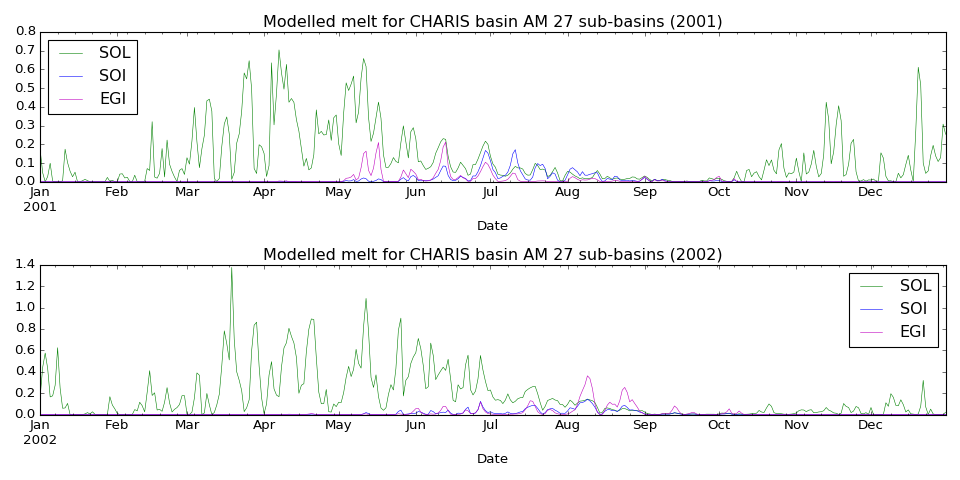

(2001, 'AM_OBJECTID100')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID100/AM_OBJECTID100.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 54 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID100/AM_OBJECTID100.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 54 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID100/AM_OBJECTID100.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 54 eleva

(2001, 'AM_OBJECTID62')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID62/AM_OBJECTID62.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 17 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID62/AM_OBJECTID62.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID62/AM_OBJECTID62.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> cha

(2001, 'AM_OBJECTID64')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID64/AM_OBJECTID64.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 2 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID64/AM_OBJECTID64.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID64/AM_OBJECTID64.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> char

(2001, 'AM_OBJECTID65')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID65/AM_OBJECTID65.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 28 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID65/AM_OBJECTID65.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID65/AM_OBJECTID65.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> cha

(2001, 'AM_OBJECTID66')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID66/AM_OBJECTID66.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 49 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID66/AM_OBJECTID66.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 49 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID66/AM_OBJECTID66.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 49 elevations.

(2001, 'AM_OBJECTID68')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID68/AM_OBJECTID68.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 20 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID68/AM_OBJECTID68.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID68/AM_OBJECTID68.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> cha

(2001, 'AM_OBJECTID69')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID69/AM_OBJECTID69.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 30 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID69/AM_OBJECTID69.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID69/AM_OBJECTID69.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> cha

(2001, 'AM_OBJECTID72')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID72/AM_OBJECTID72.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 42 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID72/AM_OBJECTID72.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 42 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID72/AM_OBJECTID72.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 42 elevations.

(2001, 'AM_OBJECTID77')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID77/AM_OBJECTID77.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 53 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID77/AM_OBJECTID77.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 53 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID77/AM_OBJECTID77.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 53 elevations.

(2001, 'AM_OBJECTID78')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID78/AM_OBJECTID78.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 55 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID78/AM_OBJECTID78.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 55 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID78/AM_OBJECTID78.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 55 elevations.

(2001, 'AM_OBJECTID79')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID79/AM_OBJECTID79.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 71 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID79/AM_OBJECTID79.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 71 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID79/AM_OBJECTID79.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 71 elevations.

(2001, 'AM_OBJECTID80')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID80/AM_OBJECTID80.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 43 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID80/AM_OBJECTID80.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 43 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID80/AM_OBJECTID80.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 43 elevations.

(2001, 'AM_OBJECTID81')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID81/AM_OBJECTID81.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 43 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID81/AM_OBJECTID81.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 43 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID81/AM_OBJECTID81.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 43 elevations.

(2001, 'AM_OBJECTID82')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID82/AM_OBJECTID82.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 62 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID82/AM_OBJECTID82.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 62 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID82/AM_OBJECTID82.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 62 elevations.

(2001, 'AM_OBJECTID83')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID83/AM_OBJECTID83.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 44 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID83/AM_OBJECTID83.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 44 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID83/AM_OBJECTID83.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 44 elevations.

(2001, 'AM_OBJECTID84')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID84/AM_OBJECTID84.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 36 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID84/AM_OBJECTID84.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID84/AM_OBJECTID84.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> cha

(2001, 'AM_OBJECTID85')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID85/AM_OBJECTID85.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 50 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID85/AM_OBJECTID85.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 50 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID85/AM_OBJECTID85.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 50 elevations.

(2001, 'AM_OBJECTID86')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID86/AM_OBJECTID86.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 36 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID86/AM_OBJECTID86.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 36 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID86/AM_OBJECTID86.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 36 elevations.

(2001, 'AM_OBJECTID88')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID88/AM_OBJECTID88.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 39 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID88/AM_OBJECTID88.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID88/AM_OBJECTID88.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> cha

(2001, 'AM_OBJECTID89')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID89/AM_OBJECTID89.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 34 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID89/AM_OBJECTID89.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 34 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID89/AM_OBJECTID89.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 34 elevations.

(2001, 'AM_OBJECTID90')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID90/AM_OBJECTID90.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 36 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID90/AM_OBJECTID90.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 36 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID90/AM_OBJECTID90.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 36 elevations.

(2001, 'AM_OBJECTID91')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID91/AM_OBJECTID91.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 23 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID91/AM_OBJECTID91.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID91/AM_OBJECTID91.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> cha

(2001, 'AM_OBJECTID93')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID93/AM_OBJECTID93.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 4 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID93/AM_OBJECTID93.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID93/AM_OBJECTID93.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> char

(2001, 'AM_OBJECTID94')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID94/AM_OBJECTID94.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 46 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID94/AM_OBJECTID94.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 46 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID94/AM_OBJECTID94.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 46 elevations.

(2001, 'AM_OBJECTID97')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID97/AM_OBJECTID97.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 64 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID97/AM_OBJECTID97.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 64 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID97/AM_OBJECTID97.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 64 elevations.

(2001, 'AM_OBJECTID98')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID98/AM_OBJECTID98.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 54 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID98/AM_OBJECTID98.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 54 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID98/AM_OBJECTID98.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 54 elevations.

(2001, 'AM_OBJECTID99')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID99/AM_OBJECTID99.2001.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 48 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID99/AM_OBJECTID99.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 48 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID99/AM_OBJECTID99.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 48 elevations.

(2002, 'AM_OBJECTID100')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID100/AM_OBJECTID100.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 54 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID100/AM_OBJECTID100.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 54 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID100/AM_OBJECTID100.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 54 eleva

(2002, 'AM_OBJECTID62')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID62/AM_OBJECTID62.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 17 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID62/AM_OBJECTID62.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID62/AM_OBJECTID62.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> cha

(2002, 'AM_OBJECTID64')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID64/AM_OBJECTID64.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 2 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID64/AM_OBJECTID64.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID64/AM_OBJECTID64.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> char

(2002, 'AM_OBJECTID65')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID65/AM_OBJECTID65.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 28 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID65/AM_OBJECTID65.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID65/AM_OBJECTID65.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> cha

(2002, 'AM_OBJECTID66')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID66/AM_OBJECTID66.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 49 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID66/AM_OBJECTID66.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 49 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID66/AM_OBJECTID66.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 49 elevations.

(2002, 'AM_OBJECTID68')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID68/AM_OBJECTID68.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 20 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID68/AM_OBJECTID68.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID68/AM_OBJECTID68.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> cha

(2002, 'AM_OBJECTID69')
(2002, 'AM_OBJECTID72')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID69/AM_OBJECTID69.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 30 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID69/AM_OBJECTID69.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID69/AM_OBJECTID69.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> cha

(2002, 'AM_OBJECTID77')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID77/AM_OBJECTID77.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 53 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID77/AM_OBJECTID77.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 53 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID77/AM_OBJECTID77.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 53 elevations.

(2002, 'AM_OBJECTID78')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID78/AM_OBJECTID78.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 55 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID78/AM_OBJECTID78.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 55 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID78/AM_OBJECTID78.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 55 elevations.

(2002, 'AM_OBJECTID79')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID79/AM_OBJECTID79.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 71 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID79/AM_OBJECTID79.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 71 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID79/AM_OBJECTID79.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 71 elevations.

(2002, 'AM_OBJECTID80')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID80/AM_OBJECTID80.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 43 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID80/AM_OBJECTID80.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 43 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID80/AM_OBJECTID80.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 43 elevations.

(2002, 'AM_OBJECTID81')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID81/AM_OBJECTID81.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 43 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID81/AM_OBJECTID81.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 43 elevations.
> charistools.hypsometry : initialized new hypsometry object


(2002, 'AM_OBJECTID82')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID82/AM_OBJECTID82.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 62 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID82/AM_OBJECTID82.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 62 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID82/AM_OBJECTID82.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 62 elevations.

(2002, 'AM_OBJECTID83')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID83/AM_OBJECTID83.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 44 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID83/AM_OBJECTID83.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 44 elevations.
> charistools.hypsometry : initialized new hypsometry object


(2002, 'AM_OBJECTID84')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID84/AM_OBJECTID84.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 36 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID84/AM_OBJECTID84.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID84/AM_OBJECTID84.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> cha

(2002, 'AM_OBJECTID85')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID85/AM_OBJECTID85.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 50 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID85/AM_OBJECTID85.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 50 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID86/AM_OBJECTID86.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 36 elevations.

(2002, 'AM_OBJECTID86')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID86/AM_OBJECTID86.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 36 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID86/AM_OBJECTID86.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 36 elevations.
> charistools.hypsometry : initialized new hypsometry object


(2002, 'AM_OBJECTID88')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID88/AM_OBJECTID88.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 39 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID88/AM_OBJECTID88.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID88/AM_OBJECTID88.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> cha

(2002, 'AM_OBJECTID89')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID89/AM_OBJECTID89.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 34 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID89/AM_OBJECTID89.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 34 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID89/AM_OBJECTID89.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 34 elevations.

(2002, 'AM_OBJECTID90')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID90/AM_OBJECTID90.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 36 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID90/AM_OBJECTID90.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 36 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID90/AM_OBJECTID90.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 36 elevations.

(2002, 'AM_OBJECTID91')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID91/AM_OBJECTID91.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 23 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID91/AM_OBJECTID91.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID91/AM_OBJECTID91.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> cha

(2002, 'AM_OBJECTID93')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID93/AM_OBJECTID93.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 4 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID93/AM_OBJECTID93.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID93/AM_OBJECTID93.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 0 dates.
> charistools.hypsometry : 0 elevations.
> char

(2002, 'AM_OBJECTID94')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID94/AM_OBJECTID94.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 46 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID94/AM_OBJECTID94.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 46 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID94/AM_OBJECTID94.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 46 elevations.

(2002, 'AM_OBJECTID97')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID97/AM_OBJECTID97.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 64 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID97/AM_OBJECTID97.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 64 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID97/AM_OBJECTID97.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 64 elevations.

(2002, 'AM_OBJECTID98')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID98/AM_OBJECTID98.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 54 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID98/AM_OBJECTID98.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 54 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID98/AM_OBJECTID98.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 54 elevations.

(2002, 'AM_OBJECTID99')


> charistools.hypsometry : read hypsometry data from AM_OBJECTID99/AM_OBJECTID99.2002.0100m.modicev04_3strike.snow_on_land_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 48 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID99/AM_OBJECTID99.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 48 elevations.
> charistools.hypsometry : initialized new hypsometry object
> charistools.hypsometry : read hypsometry data from AM_OBJECTID99/AM_OBJECTID99.2002.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_melt_by_elev.best_Vakhsh_model.txt
> charistools.hypsometry : 7 comments.
> charistools.hypsometry : 365 dates.
> charistools.hypsometry : 48 elevations.

In [34]:
pd.set_option('display.max_rows', 366)
years = np.arange(2) + 2001
fig, ax = plt.subplots(len(years),1, figsize=(12,3*len(years)))
for j, year in enumerate(years):
    # For each basin, get the 3 tri-surf melt files
    for i, drainageID in enumerate(drainageIDs):
        solfile = glob.glob("%s/%s.%d.*snow_on_land_melt_by_elev*" % (drainageID, drainageID, year))
        soifile = glob.glob("%s/%s.%d.*snow_on_ice_melt_by_elev*" % (drainageID, drainageID, year))
        egifile = glob.glob("%s/%s.%d.*exposed_glacier_ice_melt_by_elev*" % (drainageID, drainageID, year))
        print(year, drainageID)
        SOLmelt = Hypsometry(filename=solfile[0], verbose=True)
        SOImelt = Hypsometry(filename=soifile[0], verbose=True)
        EGImelt = Hypsometry(filename=egifile[0], verbose=True)
        
        # If SOLmelt is non-empty, but SOImelt and SGImelt are empty,
        # then make a copy of the dimensions of SOLmelt that is filled with zeroes
        if not SOLmelt.data.empty and SOImelt.data.empty and EGImelt.data.empty:
            SOImelt.data = SOLmelt.data.copy()
            SOImelt.data[:] = 0.
            EGImelt.data = SOLmelt.data.copy()
            EGImelt.data[:] = 0.
            
        # Calculate sums of volumes by doy
        SOLmelt_by_doy = SOLmelt.data_by_doy()
        SOImelt_by_doy = SOImelt.data_by_doy()
        EGImelt_by_doy = EGImelt.data_by_doy()
        
        if i == 0:
            title = "Modelled melt for CHARIS basin %s %d sub-basins (%d)" % (
                majorBasinID, len(drainageIDs), year)
            totalSOL = SOLmelt_by_doy.copy()
            totalSOI = SOImelt_by_doy.copy()
            totalEGI = EGImelt_by_doy.copy()

        else:
            totalSOL = totalSOL + SOLmelt_by_doy
            totalSOI = totalSOI + SOImelt_by_doy
            totalEGI = totalEGI + EGImelt_by_doy

    totalSOL.plot(ax=ax[j], title=title, color='g', linewidth=0.5, label='SOL')
    totalSOI.plot(ax=ax[j], color='b', linewidth=0.5, label='SOI')
    totalEGI.plot(ax=ax[j], color='m', linewidth=0.5, label='EGI')
    
    # handles, labels = ax[j].get_legend_handles_labels()
    ax[j].legend(loc='best')
        
fig.tight_layout()

In [35]:
plt.savefig('AM.melt_by_doy.2001-2002.png')

In [27]:
ax[j].set_title('test')